# [**시계열 알고리즘 종류**](https://paperswithcode.com/area/time-series)

[![Open in Colab](http://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thekimk/All-About-Time-Series-Analysis/blob/main/Lecture3-7_StatisticalLearning_TimeSeries_NonLinearUnivariate_KK.ipynb)

---

> **"통계추론, 기계학습 및 딥러닝의 흐름에 `시간패턴`을 반영하려 진화"**
>
> **"`지도학습(예측 분류), 비지도학습` 문제에 모두 활용되는 필수 알고리즘"** 
>
> **"`미래 예측을 포함한 추천 서비스와 같은 비즈니스`에 활용중"** 

<center><img src='Image/Expert/TS_Evolution.png' width='900'></center>

<!-- <center><img src='Image/Expert/Performance_Explanability_TimeSeries.png' width='600'></center> -->

**1) 통계추론(Statistical Inference) 알고리즘:** `통계분포`에 기반한 `설명력 중시 알고리즘`

<center><img src='Image/Expert/TS_Algorithm_Concept.png' width='700'></center> 

> **(1) 단변량 선형기반:** `Y가 1개` & `Y와 X의 관계를 선형 가정`
>
> - Linear Regression
> - `ARIMA(AutoRegressive Integrated Moving Average)`
> - `ARIMAX`
> - `SARIMAX`
>
> **(2) 다변량 선형기반:** `Y가 2개 이상` & `Y와 X의 관계를 선형 가정`
>
> - Bayesian-based Models
> - [`Vector Autoregression(VAR)`](https://en.wikipedia.org/wiki/Vector_autoregression)
> - `Vector Error Correction Model(VECM)`
>
> **(3) 비선형기반:** `Y와 X의 관계를 비선형 가정`
>
> - `Exponential Smoothing`
> - `ETS(Error/Trend/Seasonal)`
> - `Kalman Filter`
> - State Space Model
> - Change Point Detection(CPD)
> - `Autoregressive conditional heteroskedasticity(ARCH)`
> - [`Generalized Autoregressive Conditional Heteroskedasticity(GARCH)`](https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity)

**2) 기계학습/딥러닝 알고리즘:** `컴퓨팅` 기반 `인공지능 알고리즘`으로 `정확성 높은 비선형 관계` 추론

> - `Prophet`
> - `Neural Prophet`
> - `RNN(Recurrent Neural Network)`
> - `LSTM(Long Short-Term Memory)`
> - `GRU(Gated Recurrent Unit)`
> - Neural Networks Autoregression(NNAR)
> - Attention
> - Self-attention
> - Transformer

**3) Platforms:** 글로벌 기업들이 독자적으로 개발한 `시계열 분석 플랫폼` 확대중

> - [Amazon Forecast](https://aws.amazon.com/ko/forecast/)
> - [Automated ML Time-series Forecasting at Microsoft Azure](https://azure.microsoft.com/en-us/blog/build-more-accurate-forecasts-with-new-capabilities-in-automated-machine-learning/)
> - [Time Series Forecasting with Google Cloud AI Platform](https://codelabs.developers.google.com/codelabs/time-series-forecasting-with-cloud-ai-platform#0)


In [1]:
!pip install --user pmdarima

In [4]:
# Auto reload of library
%reload_ext autoreload
%autoreload 2
from module_regression import *
from module_classification import *
from module_timeseries import *

# Time series algorithms
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter
from pmdarima import AutoARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.vector_ar.var_model import VARProcess, VAR
from statsmodels.tsa.vector_ar.util import varsim
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import coint
import arch
from arch import arch_model
import hmmlearn
from hmmlearn.hmm import BaseHMM, GaussianHMM, MultinomialHMM

# **비선형 확률과정(Non-linear Process)**

## 상태 공간 모형(State Space Models)


> - **동적 시스템(Dynamic System)**  
> : `입력 시계열`을 받아 `출력 시계열`을 내놓는 `시스템/구조/함수 의미`  
> : (예시) `ARMA 모형`의 경우 백색잡음 $\epsilon_t$를 입력받아 $y_t$를 출력하는 `동적 시스템`  
>
>
> - **상태 변수(State Variable)**  
> : 동적 시스템의 상태를 설명/추론하기 위해 사용하는 `변수의 집합`    
> : (예시) `AR`($p$) 모형의 동적시스템은 $p$개의 과거 $Y$값 $\{Y_{t-1}, Y_{t-2}, \cdots, Y_{t-p}\}$이 상태변수     
> : (예시) `ARMA`($p,q$) 모형의 동적시스템은 $p$개의 과거 $Y$값 $\{Y_{t-1}, Y_{t-2}, \cdots, Y_{t-p}\}$과 $q$개의 과거 $\epsilon$값 $\{\epsilon_{t-1}, \epsilon_{t-2}, \cdots, \epsilon_{t-q}\}$이 상태변수  

$$
\begin{align*}
\text{Equation of AR}(p) && Y_t &= \phi_1 Y_{t-1} +  \cdots + \phi_p Y_{t-p} + \epsilon_t \\
\\
\text{Equation of ARMA}(p,q) && Y_t &= \phi_1 Y_{t-1} +  \cdots + \phi_p Y_{t-p} + \theta_1 \epsilon_{t-1}  \cdots  + \theta_q \epsilon_{t-q} + \epsilon_t
\end{align*}
$$

---

> **"시계열 데이터를 `동적 시스템 구조`로 보고 `관측식(Observation Equation)과 상태 전이식(State Transition Equation)`이라는 상태변수의 합으로 표현하여 `내부 구조를 파악하기 위한 모형`"**
>
> - **관측식(Observation Equation)**  
> : `현재의 상태` $x_t$와 `잡음(에러)` $\upsilon_t$으로 `실제 측정가능한 출력` $y_t$을 생성
> 
> \begin{align*}
y_t = f(x_t, \upsilon_t)  
\end{align*}
>
> - **상태 전이식(State Transition Equation)**  
> : `이전의 상태` $x_{t-1}$와 현재 생성된 `잡음(에러)` $w_t$으로 `현재의 상태` $x_t$가 생성
>
> \begin{align*}
x_t = g(x_{t-1}, w_t)  
\end{align*}

<center><img src='Image/Expert/SSM_Example.png' width='500'></center>

## 지수평활법(Simple Exponential Smoothing)

> **"`추세나 계절성 패턴이 없는 경우` 적합"**  
>
> **"미래 시계열 데이터는 `과거 특정기간 동안의 평균값`이며 그 이전의 값들은 `미래에 어떠한 정보도 주지 않는다`"**  

$$
\begin{align*}
\hat{Y}_{t+1} & = \dfrac{1}{T}\displaystyle \sum_{i=0}^{T} Y_{t-i} \\ & or \\
\hat{Y}_{t+1} & = \dfrac{\alpha}{T}\displaystyle \sum_{i=0}^{T} (1-\alpha)^i Y_{t-i} \\
\end{align*}
$$

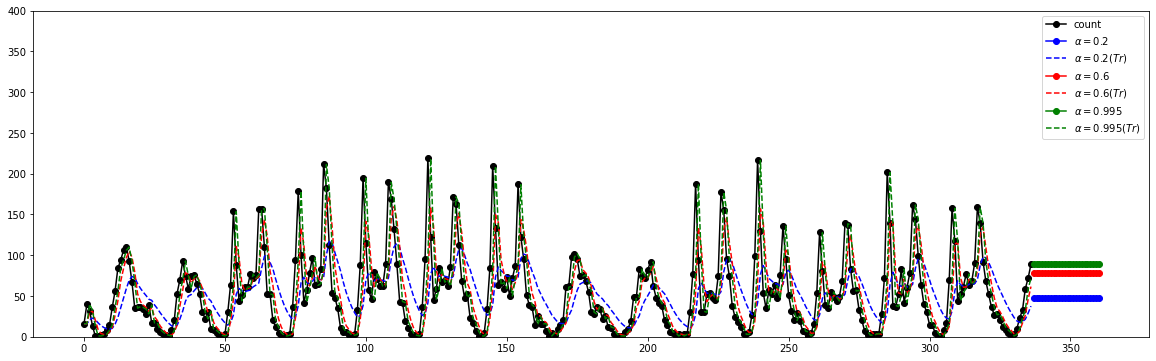

In [6]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BikeSharingDemand', 'Bike_Sharing_Demand_Full.csv')
df_all = pd.read_csv(location)

# Simple Exponential Smoothing
target = df_all.loc[:24*7*2, 'count']
target.plot(marker='o', color='black', legend=True, figsize=(20,6), ylim=(0,400))

model1 = SimpleExpSmoothing(target).fit(smoothing_level=0.2, optimized=False)
fcast1 = model1.forecast(24).rename(r'$\alpha=0.2$')
fcast1.plot(marker='o', color='blue')
model1.fittedvalues.plot(style='--',  color='blue', label=r'$\alpha=0.2(Tr)$')

model2 = SimpleExpSmoothing(target).fit(smoothing_level=0.6, optimized=False)
fcast2 = model2.forecast(24).rename(r'$\alpha=0.6$')
fcast2.plot(marker='o', color='red')
model2.fittedvalues.plot(style='--', color='red', label=r'$\alpha=0.6(Tr)$')

model3 = SimpleExpSmoothing(target).fit()
fcast3 = model3.forecast(24).rename(r'$\alpha=%s$'%model3.model.params['smoothing_level'])
fcast3.plot(marker='o', color='green')
model3.fittedvalues.plot(style='--', color='green', label=r'$\alpha=%s(Tr)$'%model3.model.params['smoothing_level'])

plt.legend()
plt.show()

## 추세 알고리즘 by Holt

> **"간단 `지수평활법`에 `추세를 반영`한 예측 알고리즘"**  

$$
\begin{align*}
\text{Main equation}  && \hat{Y}_{t+h} &= \ell_{t} + hb_{t} \\
\text{Level equation} && \ell_{t} &= \alpha Y_{t} + (1 - \alpha)(\ell_{t-1} + b_{t-1}) \\
\text{Trend equation} && b_{t}    &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 -\beta^*)b_{t-1}  
\end{align*}
$$

$$
\begin{align*}
where~0 \leq \beta^* \leq 1~is~the~smoothing~parameter~for~the~trend
\end{align*}
$$

| Year | $t$ | $Y_t$ | $ℓ_t$ | $b_t$ | $\hat{Y_t}$ |
|:------:|:---:|:-------:|:-------:|:------:|:-------:|
| 2014 | 0 |  | 17.55 | 4.31 |  |
| 2015 | 1 | 17.55 | 18.41 | 3.62 | 21.86 |
| 2016 | 2 | 21.86 | 21.89 | 3.59 | 22.03 |
| 2017 | 3 | 23.89 | 24.21 | 3.33 | 25.48 |
| 2018 | 4 | 26.93 | 27.05 | 3.24 | 27.54 |

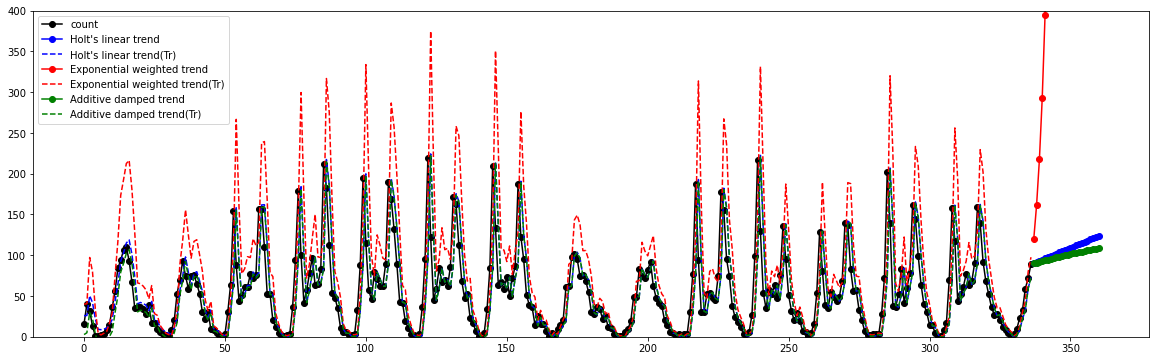

In [7]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BikeSharingDemand', 'Bike_Sharing_Demand_Full.csv')
df_all = pd.read_csv(location)

# Holt's Linear Trend
target = df_all.loc[:24*7*2, 'count']
target.plot(marker='o', color='black', legend=True, figsize=(20,6), ylim=(0,400))

model1 = Holt(target).fit()
fcast1 = model1.forecast(24).rename("Holt's linear trend")
fcast1.plot(marker='o', color='blue')
model1.fittedvalues.plot(style='--',  color='blue', label="Holt's linear trend(Tr)")

model2 = Holt(target, exponential=True).fit()
fcast2 = model2.forecast(24).rename("Exponential weighted trend")
fcast2.plot(marker='o', color='red')
model2.fittedvalues.plot(style='--', color='red', label="Exponential weighted trend(Tr)")

model3 = Holt(target, damped=True).fit()
fcast3 = model3.forecast(24).rename("Additive damped trend")
fcast3.plot(marker='o', color='green')
model3.fittedvalues.plot(style='--', color='green', label="Additive damped trend(Tr)")

plt.legend()
plt.show()

## 계절 알고리즘 by Holt-Winter

> **"`추세 알고리즘`에 `계절성을 반영`한 예측 알고리즘"**  

- **Additive Seasonal Method:** $Y_t = T_t + S_t + R_t$, 계절성 변화의 크기가 `시간 흐름에 따라 일정한 경우` 선호

\begin{align*}
\text{Main equation}     && \hat{Y}_{t+h} &= \ell_{t} + hb_{t} + s_{t-m+h_{m}^{+}} \\
\text{Level equation}    && \ell_{t} &= \alpha(Y_{t} - s_{t-m}) + (1 - \alpha)(\ell_{t-1} + b_{t-1}) \\
\text{Trend equation}    && b_{t} &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 - \beta^*)b_{t-1} \\
\text{Seasonal equation} && s_{t} &= \gamma (y_{t}-\ell_{t-1}-b_{t-1}) + (1-\gamma)s_{t-m} \\
\end{align*}

\begin{align*}
where~h_{m}^{+} = \lfloor(h-1)/m\rfloor+1~ensures~that~estimates~of~the~sesonal~indices~come~from~the~final~year~of~the~sample \\
\end{align*}

- **Multiplicative Seasonal Method:** $Y_t = T_t \times S_t \times R_t$, 계절성 변화의 크기가 `시간 흐름에 비례하여 변경되는 경우` 선호

\begin{align*}
\text{Main equation}     && \hat{Y}_{t+h} &= (\ell_{t} + hb_{t})s_{t-m+h_{m}^{+}} \\
\text{Level equation}    && \ell_{t} &= \alpha \frac{Y_{t}}{s_{t-m}} + (1 - \alpha)(\ell_{t-1} + b_{t-1}) \\
\text{Trend equation}    && b_{t} &= \beta^*(\ell_{t}-\ell_{t-1}) + (1 - \beta^*)b_{t-1} \\
\text{Seasonal equation} && s_{t} &= \gamma \frac{y_{t}}{(\ell_{t-1} + b_{t-1})} + (1 - \gamma)s_{t-m} \\
\end{align*}

- **Damped Seasonal Method:** `Additive와 Multiplicative 모두 사용`되며 장기 예측시 `무한정 증가/감소를 방지`

\begin{align*}
\text{Main equation}     && \hat{Y}_{t+h} &= \left[\ell_{t} + (\phi+\phi^2 + \dots + \phi^{h})b_{t}\right]s_{t+h-m(k+1)} \\
\text{Level equation}    && \ell_{t} &= \alpha(y_{t} / s_{t-m}) + (1 - \alpha)(\ell_{t-1} + \phi b_{t-1}) \\
\text{Trend equation}    && b_{t} &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 - \beta^*)\phi b_{t-1} \\
\text{Seasonal equation} && s_{t} &= \gamma \frac{y_{t}}{(\ell_{t-1} + \phi b_{t-1})} + (1 - \gamma)s_{t-m} \\
\end{align*}

---

- **Summary of Smoothing Parameters:**

| Level | Trend | Seasonality | Damping |
|:------:|:------:|:-------:|:--------:|
| $\alpha$ | $\beta$ | $\gamma$ | $\phi$ |

---

- **Example of Estimation Process:**

|  | $t$ | $Y_t$ | $\ell_t$ | $b_t$ | $s_t$ | $\hat{Y}_t$ |
|:----:|:-----:|:----:|:-------:|:-------:|:----------:|:----------:|
| 2004 Q1 | -3 | - | - | - | 1.24 | - |
| 2004 Q2 | -2 | - | - | - | 0.77 | - |
| 2004 Q3 | -1 | - | - | - | 0.96 | - |
| 2004 Q4 | 0 | - | 32.49 | 0.7 | 1.02 | - |
| 2005 Q1 | 1 | 42.21 | 33.51 | 0.71 | 1.24 | 41.29 |
| 2005 Q2 | 2 | 24.65 | 33.24 | 0.68 | 0.77 | 26.36 |
| 2005 Q3 | 3 | 32.67 | 33.94 | 0.68 | 0.96 | 32.62 |
| 2005 Q4 | 4 | 37.26 | 35.4 | 0.7 | 1.02 | 35.44 |
| ⋮ | ⋮ | ⋮ | ⋮ | ⋮ | ⋮ | ⋮ |
| 2015 Q1 | 41 | 73.26 | 58.57 | 0.66 | 1.24 | 72.59 |
| 2015 Q2 | 42 | 47.7 | 60.42 | 0.69 | 0.77 | 45.62 |
| 2015 Q3 | 43 | 61.1 | 62.17 | 0.72 | 0.96 | 58.77 |
| 2015 Q4 | 44 | 66.06 | 63.62 | 0.75 | 1.02 | 64.38 |
| - | \begin{align*}h\end{align*} | - | - | - | - | \begin{align*}\hat{Y}_{T+h}\end{align*} |
| 2016 Q1 | 1 | - | - | - | - | 80.09 |
| 2016 Q2 | 2 | - | - | - | - | 50.15 |
| 2016 Q3 | 3 | - | - | - | - | 63.34 |
| 2016 Q4 | 4 | - | - | - | - | 68.18 |
| 2017 Q1 | 5 | - | - | - | - | 83.8 |
| 2017 Q2 | 6 | - | - | - | - | 52.45 |
| 2017 Q3 | 7 | - | - | - | - | 66.21 |
| 2017 Q4 | 8 | - | - | - | - | 71.23 |


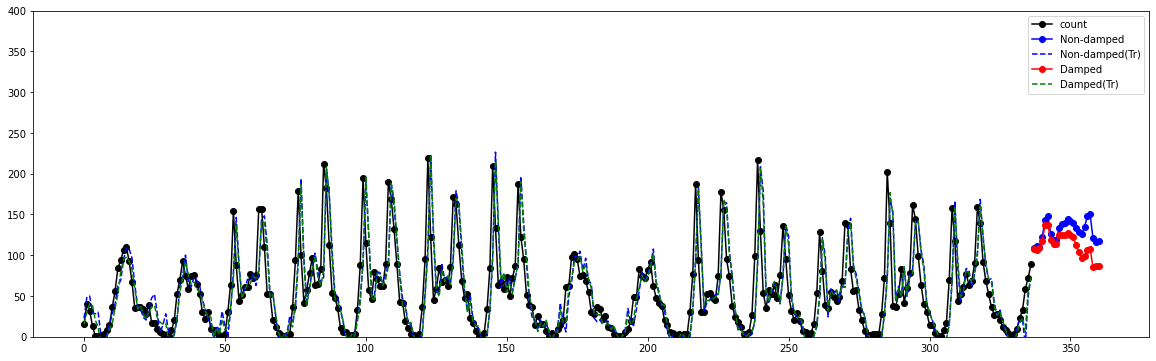

In [8]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'BikeSharingDemand', 'Bike_Sharing_Demand_Full.csv')
df_all = pd.read_csv(location)

# Holt-Winter's Seasonal
target = df_all.loc[:24*7*2, 'count']
target.plot(marker='o', color='black', legend=True, figsize=(20,6), ylim=(0,400))

model1 = ExponentialSmoothing(target, seasonal_periods=24, trend='add', seasonal='add').fit()
fcast1 = model1.forecast(24).rename("Non-damped")
fcast1.plot(marker='o', color='blue')
model1.fittedvalues.plot(style='--', color='blue', label="Non-damped(Tr)")

model2 = ExponentialSmoothing(target, seasonal_periods=24, trend='add', seasonal='add', damped=True).fit()
fcast2 = model2.forecast(24).rename("Damped")
fcast2.plot(marker='o', color='red')
model2.fittedvalues.plot(style='--', color='green', label="Damped(Tr)")

plt.legend()
plt.show()

## 지수평활법 알고리즘 분류

- **알고리즘 옵션 분류:**

| Trend Component | Seasonal Component | - | - |
|:--------:|:-------:|:-------:|:-------:|
| - | N | A | M |
| - | (None) | (Additive) | (Multiplicative) |
| N (None) | (N,N) | (N,A) | (N,M) |
| A (Additive) | (A,N) | (A,A) | (A,M) |
| $A_d$ (Additive damped) | ($A_d$,N) | ($A_d$,A) | ($A_d$,M) |

---

- **각 옵션 분류별 알고리즘 종류:**

| Short hand | Method |
|:---------:|:----------:|
| (N,N) | Simple exponential smoothing |
| (A,N) | Holt’s linear method |
| ($A_d$,N) | Additive damped trend method |
| (A,A) | Additive Holt-Winters’ method |
| (A,M) | Multiplicative Holt-Winters’ method |
| ($A_d$,M) | Holt-Winters’ damped method |

---

<center><img src='Image/Expert/TS_ExponentialSmoothing.png' width='800'></center> 

## ETS(Error/Trend/Seasonal) 알고리즘

**(1) ETS(A,N,N):** `simple exponential` smoothing with `additive` errors  

**(2) ETS(M,N,N):** `simple exponential` smoothing with `multiplicative` errors

**(3) ETS(A,A,N):** `Holt’s linear` method with `additive` errors  

**(4) ETS(M,A,N):** `Holt’s linear` method with `multiplicative` errors 

<center><img src='Image/Expert/TS_ETS_Figure.png' width='600'></center> 

---

<center><img src='Image/Expert/TS_ETS_Equation.png' width='800'></center> 

---

| Model 	| Forecast variance: $\sigma_h^2$ 	|
|:-----:|:-------:|
| (A,N,N) 	| \begin{align*}\sigma_h^2 = \sigma^2\big[1 + \alpha^2(h-1)\big]\end{align*} 	|
| (A,A,N) 	| \begin{align*}\sigma_h^2 = \sigma^2\Big[1 + (h-1)\big\{\alpha^2 + \alpha\beta h + \frac16\beta^2h(2h-1)\big\}\Big]\end{align*} 	|
| (A,$A_d$,N) 	| \begin{align*}\sigma_h^2 = \sigma^2\biggl[1 + \alpha^2(h-1) + \frac{\beta\phi h}{(1-\phi)^2} \left\{2\alpha(1-\phi) +\beta\phi\right\} \\ \mbox{} - \frac{\beta\phi(1-\phi^h)}{(1-\phi)^2(1-\phi^2)} \left\{ 2\alpha(1-\phi^2)+ \beta\phi(1+2\phi-\phi^h)\right\}\biggr]\end{align*} 	|
| (A,N,A) 	| \begin{align*}\sigma_h^2 = \sigma^2\Big[1 + \alpha^2(h-1) + \gamma k(2\alpha+\gamma)\Big]\end{align*} 	|
| (A,A,A) 	| \begin{align*}\sigma_h^2 = \sigma^2\Big[1 + (h-1)\big\{\alpha^2 + \alpha\beta h + \frac16\beta^2h(2h-1)\big\} \\ \mbox{} + \gamma k \big\{2\alpha+ \gamma + \beta m (k+1)\big\} \Big]\end{align*} 	|
| (A,$A_d$,A) 	| \begin{align*}\sigma_h^2 = \sigma^2\biggl[1 + \alpha^2(h-1) + \gamma k(2\alpha+\gamma) \\ \mbox{} +\frac{\beta\phi h}{(1-\phi)^2} \left\{2\alpha(1-\phi) + \beta\phi \right\} \\ \mbox{} - \frac{\beta\phi(1-\phi^h)}{(1-\phi)^2(1-\phi^2)} \left\{ 2\alpha(1-\phi^2)+ \beta\phi(1+2\phi-\phi^h)\right\} \\ \mbox{} + \frac{2\beta\gamma\phi}{(1-\phi)(1-\phi^m)}\left\{k(1-\phi^m) - \phi^m(1-\phi^{mk})\right\}\biggr]\end{align*} 	|

<!-- ### 상태공간 모형과 ARIMA 모형의 관계

> **"`동적 선형모형(Dynamics Linear Model)` vs. `ARIMA 모형`"**
> - `모든 ARIMA 모형`은 동일한 출력(Measurement)을 가지는 `동적 선형 모형으로 표현가능`하며, 조합 방법은 무한함
> - `모든 동적 선형모형`은 `ARIMA 모형으로 표현 가능`

---

**(1-1) 상태공간모형 $\Longrightarrow$ ARMA:**

$$
\begin{align*}
\text{Main Equation of State Space Model} && Y_{t} &= A_t X_{t} =  A_t (I- \Phi_t L)^{-1} w_t \\
\text{where} && X_{t} &= \Phi_t X_{t-1} + w_t \\
&& &= \Phi_t L X_{t} + w_t \\
&& (I- \Phi_t L) X_{t} &=  w_t \\
&& X_{t} &=  (I- \Phi_t L)^{-1} w_t \\
\end{align*}
$$

**(1-2) ARMA(p,q) $\Longrightarrow$ 상태공간모형:** 상태변수를 정하는 방법이 무한하기에 `표준형식(Canonical Form)`을 따름

$$
\begin{align*}
\text{Main Equation of ARMA(p,q)} && Y_t &= \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \cdots + \phi_p Y_{t-p} + e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2} + \cdots + \theta_q e_{t-q} \\
\text{let $r=max(p,q+1)$} && Y_{t} &= \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \cdots + \phi_r Y_{t-r} + e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2} + \cdots + \theta_{r-1} e_{t-(r-1)} \\
\text{Insert State Space} && Y_t &=
\begin{bmatrix} 1 & 0 & \cdots & 0 \end{bmatrix}
\begin{bmatrix}
x_{t,1} \\ x_{t,2} \\ \vdots  \\ x_{t,r-1} \\ x_{t,r} \\
\end{bmatrix} \\
\text{where} && x_{1,t} &= \phi_1 x_{1,t-1} + x_{2,t-1} + e_t \\
&& x_{2,t} &= \phi_2 x_{1,t-1} + x_{3,t-1} + \theta_1 e_t \\
&& x_{3,t} &= \phi_3 x_{1,t-1} + x_{4,t-1} + \theta_2 e_t \\
&& & \vdots \\
&& x_{r-1,t} &= \phi_{r-1} x_{1,t-1} + x_{r,t-1} + \theta_{r-2} e_t \\
&& x_{r,t} &= \phi_{r} x_{1,t-1} + \theta_{r-1} e_t \\
\text{Induced} && x_{1,t} &= \phi_1 x_{1,t-1} + \phi_2 x_{1,t-2} + \cdots + \phi_r x_{1,t-r} + e_t +  \theta_1 e_t + \cdots + \theta_{r-1} e_{t-(r-1)} \\
\text{State Space Form} && Y_t &=
\begin{bmatrix} 1 & 0 & \cdots & 0 \end{bmatrix}
\begin{bmatrix}
x_{t,1} \\ x_{t,2} \\ \vdots  \\ x_{t,r-1} \\ x_{t,r} \\
\end{bmatrix} \\
\text{where} &&
\begin{bmatrix}
x_{t,1} \\ x_{t,2} \\ \vdots  \\ x_{t,r-1} \\ x_{t,r} \\
\end{bmatrix}
&= \begin{bmatrix}
\phi_1     &      1 &      0 & \cdots &      0 \\
\phi_2     &      0 &      1 & \cdots &      0 \\
\vdots     & \vdots & \vdots & \ddots & \vdots \\
\phi_{r-1} &      0 &      1 & \cdots &      1 \\
\phi_r     &      0 &      0 & \cdots &      0 \\
\end{bmatrix}
\begin{bmatrix}
x_{t-1,1} \\ x_{t-1,2} \\ \vdots  \\ x_{t-1,r-1} \\ x_{t-1,r} \\
\end{bmatrix}
+
\begin{bmatrix}
1 & \theta_1 & \cdots & \theta_{r-1}
\end{bmatrix}
\begin{bmatrix}
e_{1} \\ e_{2} \\ \vdots  \\ e_{r-1} \\ e_{r} \\
\end{bmatrix}
\end{align*}
$$

---

**(2) ARIMA(p,d,q) $\Longrightarrow$ 상태공간모형** : $\Delta^d Y_t = ARMA(p,q)$

$$
\begin{align*}
\text{Each Equation of $\Delta^d Y_t$} && \Delta^{1} Y_{t} &= Y_t - Y_{t-1} \\
&& \Delta^{2} Y_{t} &= \Delta^{1} Y_{t}- \Delta^{1} Y_{t-1} \\
&& & \vdots \\
&& \Delta^{d} Y_{t} &= \Delta^{d-1} Y_{t}- \Delta^{d-1} Y_{t-1} \\
\text{State Space Form} && Y_t &=
\begin{bmatrix} 1 & 1 & \cdots & 1 & 1 & 0 & \cdots & 0 \end{bmatrix}
\begin{bmatrix}
Y_{t} \\ \Delta Y_{t-1} \\ \vdots  \\ \Delta^{d-1} Y_{t-1} \\ \Delta^{d} Y_{t-1} \\
x_{t,2} \\ \vdots  \\ x_{t,r-1} \\ x_{t,r} \\ \end{bmatrix} \\
\text{where} &&
\begin{bmatrix}
Y_{t-1} \\ \Delta Y_{t-1} \\ \vdots  \\ \Delta^{d-1} Y_{t-1} \\ \Delta^{d} Y_{t} \\
x_{t,2} \\ \vdots  \\ x_{t,r-1} \\ x_{t,r} \\
\end{bmatrix}
&= \begin{bmatrix}
1      &      1 & \cdots &      1 &          1 &      0 &      0 &\cdots &      0 \\
0      &      1 & \cdots &      1 &          1 &      0 &      0 &\cdots &      0 \\
\vdots & \vdots & \vdots & \vdots &     \vdots &      0 &      0 &\cdots &      0 \\
0      &      0 & \cdots &      1 &          1 &      0 &      0 & \cdots &      0 \\
0      &      0 & \cdots &      0 &     \phi_1 &      1 &      0 & \cdots &      0 \\
0      &      0 & \cdots &      0 &     \phi_2 &      0 &      1 & \cdots &      0 \\
0      &      0 & \cdots &      0 &     \vdots & \vdots & \vdots & \ddots & \vdots \\
0      &      0 & \cdots &      0 & \phi_{r-1} &      0 &      1 & \cdots &      1 \\
0      &      0 & \cdots &      0 &     \phi_r &      0 &      0 & \cdots &      0 \\
\end{bmatrix}
\begin{bmatrix}
Y_{t-2} \\ \Delta Y_{t-2} \\ \vdots  \\ \Delta^{d-1} Y_{t-2} \\ \Delta^{d} Y_{t-1} \\ x_{t-1,2} \\
\vdots  \\ x_{t-1,r-1} \\ x_{t-1,r} \\
\end{bmatrix} \\
&& &+
\begin{bmatrix}
0 & \cdots & 0 & 1 & \theta_1 & \cdots & \theta_{r-1}
\end{bmatrix}
\begin{bmatrix}
0 \\ 0 \\ \vdots  \\ 0 \\ e_{1} \\ e_{2} \\ \vdots  \\ e_{r-1} \\ e_{r} \\
\end{bmatrix}
\end{align*}
$$ -->

### 로컬레벨 모형(Local Level Model)

> **"`랜덤워크` 모형에 `관측잡음이 추가된 것`으로 랜덤워크 과정을 따르는 단변수 상태변수 $\mu_t$를 가짐"**
>
> \begin{align*}
\mu_t &= \mu_{t-1} + w_t &,\;\;\; & w_t \sim N(0, \sigma_w^2) \\
Y_{t} &= \mu_{t} + v_t &,\;\;\; & v_t \sim {N}(0, \sigma_v^2) \\
\end{align*}

---

**1) 로컬레벨 모형 $\Longrightarrow$ ARIMA 모형:** 로컬레벨 모형은 `ARIMA(0,1,1)의 다른표현`

> - $\Delta Y_t$는 $MA(1)$ 모형을 따르고 $Y_t$는 $ARIMA(0,1,1)$ 모형을 따름

\begin{align*}
\text{Setting of $\mu_t$} && \mu_t &= Y_t - v_t \\
\text{Equation of Local Level Model} && Y_t - v_t &= Y_{t-1} - v_{t-1} + w_t \\
\text{Equation of ARIMA Model} && \Delta Y_t &= Y_t - Y_{t-1} = w_t + v_t - v_{t-1} \\
\text{Expectation} && \text{E} \left( \Delta Y_t \right) &= \text{E} \left( w_t + v_t - v_{t-1} \right) =0 \\
\text{Variance} && \text{E} ( \Delta Y_t^2 ) &= \text{E} \left[ (w_t + v_t - v_{t-1})(w_{t} + v_{t} - v_{t-1}) \right] \\
&& &= \text{E} \left( w_t^2 + v_t^2 + v_{t-1}^2 \right) \\
&& &= \sigma_w^2 + 2\sigma_v^2 \\
\text{Autocorrelation(1)} && \text{E} ( \Delta Y_t \Delta Y_{t-1} ) &= \text{E} \left[ (w_t + v_t - v_{t-1})(w_{t-1} + v_{t-1} - v_{t-2}) \right] \\
&& &= - \text{E} \left( v_{t-1}^2 \right) \\
&& &= -\sigma_v^2 \\
\text{Autocorrelation($l$)} && \text{E} ( \Delta Y_t \Delta Y_{t-l} ) &= 0, \;\;\; \text{for } l > 1
\end{align*}

---

**2) ARIMA 모형과의 차이점:**

> **ARIMA(0,1,1)이 아닌 `로컬 레벨 모형을 사용하는 이유`는 아래와 같이 이유와 가정 때문**
>
> - 우리가 `관심을 가지는 값`은 어떤 이유에 의해 `반드시 랜덤 워크 모형을 따라야` 한다.
> - 그런데 `시계열 데이터` $Y_t$는 `랜덤 워크 모형을 따르지 않는다.` (ARIMA(0,1,1) 모형을 따름)
> - 그러므로 시계열 데이터 $Y_t$는 우리가 원하는 `랜덤 워크` $\mu_t$에 `관측 잡음이 더해진 걸로 가정`하자.
> - 이제 변경된 풀어야 하는 문제는 시계열 데이터 $Y_t$를 사용하여 `랜덤 워크 모형을 따르는, 그러나 잡음을 제거한 원래의 값` $\mu_t$이다.

- **예시문제1:**  

> (1) 어떤 섬 근처에서 배가 엔진을 끄고 정지해 있다.  
> (2) 이 배는 파도에 의한 브라운 운동(Brown montion)을 하게 된다.  
> (3) 파도의 랜덤한 힘에 밀려 배의 위치는 다음과 같은 수식으로 변화된다.  
> \begin{align*}
\mu_t = \mu_{t-1} + w_t
\end{align*}  
> (4) 매 시간마다 배의 선원은 섬으로부터의 거리 $Y_t$를 배에 있는 초음파 거리계(ultrasonic range finder)로 측정한다.  
> (5) 이러한 경우에 정확한 거리 $\mu_t$를 알고자 하는 것이 바로 로컬 레벨 모형의 필터링(filtering) 문제가 된다.  

- **예시문제2:**  

> (1) 효율적인 시장에서 거래되는 주식의 가격, 즉 주가는 일반적으로 랜덤 워크를 따르는 것으로 생각할 수 있다.  
> (2) 시장 미시구조 잡음이 있는 주가로부터 근본적인 주식의 내재 가치 즉, 랜덤 워크를 따르는 가치를 추정하고자 하는 경우도 로컬 레벨 모형의 필터링 문제로 볼 수 있다.    

### **로컬레벨모델링 실습:** 데이터생성 및 이해

In [6]:
# nsimulations = 10
# sigma2 = 2
# measurement_shocks = np.zeros(nsimulations)
# state_shocks = np.random.normal(scale=sigma2**0.5, size=nsimulations)
    
# mod = KalmanFilter(k_endog=1, k_states=1)
# mod['design', 0, 0] = 1.
# mod['transition', 0, 0] = 1.
# mod['selection', 0, 0] = 1.
# mod.simulate(nsimulations, measurement_shocks=measurement_shocks,
#         state_shocks=state_shocks)

In [7]:
# # 데이터 생성
# np.random.seed(123)
# model_generator = KalmanFilter(k_endog=1, k_states=1,
#                                transition=[[1]], selection=[[1]], state_cov=[[1]],
#                                design=[[1]], obs_cov=[[1]]).simulate(100)
# y_gener, x_gener = model_generator.simulate(100)

# # 데이터 생성
# plt.figure(figsize=(10,6))
# plt.plot(y_gener, 'r:', label="Observation Values")
# plt.plot(x_gener, 'g-', label="State Values")
# plt.legend()
# plt.title("Simulation of Local Level Model ($\sigma_w^2 = 1$, $\sigma_v^2 = 1$)")
# plt.show()

In [8]:
# # 데이터 생성
# np.random.seed(123)
# model_generator = KalmanFilter(k_endog=1, k_states=1,
#                                transition=[[1]], selection=[[1]], state_cov=[[10]],
#                                design=[[1]], obs_cov=[[1]])
# y_gener, x_gener = model_generator.simulate(100)

# # 데이터 생성
# plt.figure(figsize=(10,6))
# plt.plot(y_gener, 'r:', label="Observation Values")
# plt.plot(x_gener, 'g-', label="State Values")
# plt.legend()
# plt.title("Simulation of Local Level Model ($\sigma_w^2 = 10$, $\sigma_v^2 = 1$)")
# plt.show()

In [9]:
# # 데이터 생성
# np.random.seed(123)
# model_generator = KalmanFilter(k_endog=1, k_states=1,
#                                transition=[[1]], selection=[[1]], state_cov=[[1]],
#                                design=[[1]], obs_cov=[[10]])
# y_gener_target, x_gener_target = model_generator.simulate(100)

# # 데이터 생성
# plt.figure(figsize=(10,6))
# plt.plot(y_gener_target, 'r:', label="Observation Values")
# plt.plot(x_gener_target, 'g-', label="State Values")
# plt.legend()
# plt.title("Simulation of Local Level Model ($\sigma_w^2 = 10$, $\sigma_v^2 = 1$)")
# plt.show()

# # 로컬레벨모형 추정
# fit = sm.tsa.UnobservedComponents(y_gener_target, level='local level').fit()
# fit.summary()

In [10]:
# # 추정치 시각화
# plt.figure(figsize=(10,6))
# plt.plot(y_gener_target, 'r:', label="Observation Values")
# plt.plot(x_gener_target, 'g-', label="State Values")
# plt.plot(fit.filtered_state[0], 'b-.', label="Estimation of State Values")
# plt.legend()
# plt.title("Kalman Filtering of Local Level Model")
# plt.show()

# # 레벨추정 성분 시각화
# fit.plot_components(figsize=(10,8))
# plt.show()

# # 잔차진단
# fit.plot_diagnostics(figsize=(10,8))
# plt.show()

In [11]:
# # 예측
# plt.figure(figsize=(10,6))
# forecast = fit.get_forecast(50)
# plt.plot(y_gener_target, 'r:', label="Observation Values")
# forecast_ci = forecast.conf_int()
# forecast_index = np.arange(len(y_gener_target), len(y_gener_target) + len(forecast_ci))
# plt.plot(forecast_index, forecast.predicted_mean, label="Observation Values")
# plt.fill_between(forecast_index, forecast_ci[:, 0], forecast_ci[:, 1], alpha=0.1)
# plt.grid()
# plt.show()

### 로컬선형레벨 모형

> **"`랜덤 워크 모형의 관측값이 다시 누적된 것`으로 랜덤워크 과정을 따르는 단변수 상태변수 $\beta_t$를 가짐"**
>
> \begin{align*}
&& \beta_t &= \beta_{t-1} + w_{\beta,t} &,\;\;\; & w_{\beta,t} \sim N(0, \sigma_\beta^2) \\
&& \mu_t &= \mu_{t-1} + \beta_{t-1} + w_{\mu,t} &,\;\;\; & w_{\mu,t} \sim N(0, \sigma_\mu^2) \\
&& Y_{t} &= \mu_{t} + v_t &,\;\;\; & v_t \sim {N}(0, \sigma_v^2) \\
\text{Matrix Form} &&
\begin{bmatrix}
\beta_t \\ \mu_t
\end{bmatrix}
&=
\begin{bmatrix}
1 & 0 \\ 1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
\beta_{t-1} \\ \mu_{t-1}
\end{bmatrix}
+
\begin{bmatrix}
w_{\beta,t} \\ w_{\mu,t}
\end{bmatrix}
\end{align*}

---

**1) 로컬선형레벨 모형 $\Longrightarrow$ ARIMA 모형:** 로컬선형레벨 모형은 `ARIMA(0,2,2)의 다른표현`

> - $\Delta^2 Y_t$는 $MA(2)$ 모형을 따르고 $Y_t$는 $ARIMA(0,2,2)$ 모형을 따름

\begin{align*}
\text{Setting of $\mu_t$} && \mu_t &= Y_t - v_t \\
\text{Equation of Local Level Model} && Y_t - v_t &= Y_{t-1} - v_{t-1} + \beta_{t-1} + w_{\mu,t} \\
&& \Delta Y_t &= Y_t - Y_{t-1} = \beta_{t-1} + w_{\mu,t} + v_t - v_{t-1} \\
\text{Equation of Local Level Model($\beta$)} && \beta_{t-1} &= \Delta Y_t - w_{\mu,t} - v_t + v_{t-1} \\
&& \Delta Y_{t+1} - w_{\mu,t+1} - v_{t+1} + v_{t} &= \Delta Y_t - w_{\mu,t} - v_t + v_{t-1}  + w_{\beta,t} \\
&& \Delta Y_{t+1} - \Delta Y_t &= w_{\mu,t+1} + v_{t+1} - v_{t} - w_{\mu,t} - v_t + v_{t-1}  + w_{\beta,t} \\
\text{Equation of ARIMA Model} && \Delta^2 Y_{t+1} &= w_{\mu,t+1} + v_{t+1} - v_{t} - w_{\mu,t} - v_t + v_{t-1}  + w_{\beta,t} \\
\end{align*}

- **예시문제1:**  

> (1) 어떤 섬 근처에서 배가 엔진을 끄고 정지해 다가 어느 시점에 일정 속도로 움직이기 시작했다.  
> (2) 배의 속도 $\beta_t$는 일정하게 유지하고자 하지만 기관의 특성상 조금씩 속도의 변화가 누적될 수 있고, 이 속도 변화 $w_{\beta,t}$는 가우시안 정규 분포를 따른다고 가정하자.  
> (3) 또한 배의 속도 $\beta_t$에 의해 배의 위치 $\mu_t$는 변화하게 되는데 이 경우에도 파도의 힘에 의해 조금씩 앞뒤로 위치가 바뀔 수 있고 이 미세한 위치 변화 $w_{\mu,t}$도 가우시안 정규 분포를 따른다고 가정하자.  
> (4) 매 시간마다 배의 선원은 섬으로부터의 거리 $Y_t$를 배에 있는 초음파 거리계(ultrasonic range finder)로 측정한다.  
> (5) 이러한 경우에 정확한 거리 $\mu_t$를 알고자 하는 것이 바로 로컬 레벨 모형의 필터링(filtering) 문제가 된다.  
(*로컬 선형 추세 모형은 오차가 큰 GPS 신호를 사용한 네비게이션에서 차량의 정확한 위치를 추정하는데도 사용된다.)  

- **예시문제2:**  

> (1) 거시경제(macro economics) 모형에서 사용하는 대부분의 지표값은 시간이 지나며 선형적 혹은 지수함수적으로 증가하는 경우가 많다.  
> (2) 이러한 시계열 값은 모두 로컬 선형 추세 모형으로 모형화가 가능하다.    

### **로컬레벨모델링 실습:** 데이터생성 및 이해

In [9]:
# import numpy as np
# import matplotlib.pyplot as plt
# import statsmodels.api as sm
# from statsmodels.tsa.statespace.kalman_filter import KalmanFilter

# # 데이터 생성
# np.random.seed(0)
# model_generator = KalmanFilter(k_endog=1, k_states=2, transition=[[1, 0], [1, 1]], 
#                                state_intercept=[[0], [3]], selection=[[1, 0], [0, 1]], state_cov=[[1, 0], [0, 1]],
#                                design=[[0, 1]], obs_cov=[[500]])
# y_gener, x_gener = model_generator.simulate(100)

# # 데이터 생성
# plt.figure(figsize=(10,6))
# plt.plot(y_gener, label="Observation Values")
# plt.plot(x_gener.T[0], label="Speed State")
# plt.plot(x_gener.T[1], label="Position State")
# plt.legend()
# plt.title("Local Level Trend Model")
# plt.show()

# # 로컬선형레벨모형 추정
# fit = sm.tsa.UnobservedComponents(y_gener, level='local linear trend').fit()
# fit.summary()

NotImplementedError: Simulation only available through the simulation smoother.

In [13]:
# # 추정치 시각화
# plt.figure(figsize=(10,6))
# plt.plot(y_gener, label="Observation Values")
# plt.plot(x_gener.T[0], label="Speed State")
# plt.plot(x_gener.T[1], label="Position State")
# plt.plot(fit.filtered_state[0], label="Filtered Position State")
# plt.plot(fit.filtered_state[1], label="Filtered Speed State")
# plt.legend()
# plt.title("Kalman Filtering of Local Linear Trend Model")
# plt.show()

# # 레벨추정 성분 시각화
# fit.plot_components(legend_loc=2, figsize=(10,10))
# plt.show()

# # 잔차진단
# fit.plot_diagnostics(figsize=(10,8))
# plt.show()

In [14]:
# # 예측
# plt.figure(figsize=(10,6))
# forecast = fit.get_forecast(50)
# plt.plot(y_gener, 'r:', label="Observation Values")
# forecast_ci = forecast.conf_int()
# forecast_index = np.arange(len(y_gener), len(y_gener) + len(forecast_ci))
# plt.plot(forecast_index, forecast.predicted_mean, label="Observation Values")
# plt.fill_between(forecast_index, forecast_ci[:, 0], forecast_ci[:, 1], alpha=0.1)
# plt.grid()
# plt.show()

## 상태공간모형 기반 구조화모형

> **"`개별적 동적 특성(Dynamics, Transition Equation)`을 정의할 수 있는 `성분의 합 등으로 구성된 모형`을 구조적 모형 또는 구조화 모형(Structural Model)**
>
> - 로컬 선형추세 모형에서 볼 수 있듯, 상태공간모형의 `장점`은 실제로 `관측된 하나의 시계열 자료로 부터 복수의 상태변수 추정`할 수 있다는 점
> - 각각의 `상태변수`가 `동적특성(Dynamics)`, 즉 상태 전이식(State Transition Equantion)에 대한 `가정 필요`
> - `하나의 시계열 데이터`가 실제 여러개의 `보이지 않는 성분들(Unobserved Components)이 합쳐진 것`이라고 가정하고 각각의 성분을 추정하는 것이 가능(`시계열 성분분리 가능`)
> - 각 성분의 동적특성을 이미 알거나 가정해야 하며 `각 동적 특성이 구별가능할 정도로 충분이 달라야 함`
> - `보이지 않는 성분을 추정하는 모형`이므로 Unobserved Component 모형이라고도 불림

---

- **구조화모형 성분:**  

> 1) `추세(Trend) 성분`  
> 2) `계절성(Seasonal) 성분`  
> 3) `주기적(Cyclical) 성분`  
> 4) `AR(Autoregressive) 성분`  
> 5) `회귀(Regression) 성분`  
>
> - **예시:** 시계열 = `추세성분 + 계절성성분 + ARMA성분`
>
> \begin{align*}
\text{Main Equation} && Y_{T} &= T_{t} + S_{t} + A_{t} \\
\text{Each Equations} && T_{t} &= \Phi_T T_{t-1} + w_{T,t} \\
&& S_{t} &= \Phi_S S_{t-1} + w_{S,t} \\
&& A_{t} &= \Phi_A A_{t-1} + w_{A,t} \\
\text{Matrix Form} &&
Y_{T} &=
\begin{bmatrix}
1 & 1 & 1
\end{bmatrix}
\begin{bmatrix}
T_{t} \\ S_{t} \\ A_{t} \\
\end{bmatrix}
+ v_t \\
\text{where} &&
\begin{bmatrix}
T_{t} \\ S_{t} \\ A_{t} \\
\end{bmatrix}
&=
\begin{bmatrix}
\Phi_T &   0     &        \\
0      & \Phi_S  &      0 \\
0      &      0  & \Phi_A \\
\end{bmatrix}
\begin{bmatrix}
T_{t-1} \\ S_{t-1} \\ A_{t-1} \\
\end{bmatrix}
+
\begin{bmatrix}
w_{T,t} \\ w_{S,t} \\ w_{A,t} \\
\end{bmatrix} \\
\end{align*}

---
  
**1) 추세(Trend) 성분:** `로컬레벨 모형이나 로컬선형추세 모형`도 추세성분 모형의 일종

- `레벨모형`
\begin{align*}
\text{Fixed Intercept} && y_t &= \mu \\
\text{Deterministic Constant} && y_t &= \mu + \varepsilon_t \\
\text{Local Level} && y_t &= \mu_t + \varepsilon_t \\
&& \mu_t &= \mu_{t-1} + \eta_t \\
\end{align*}

- `결정론적 추세`
\begin{align*}
\text{Fixed Slope} && y_t &= \mu_t \\
&& \mu_t &= \mu_{t-1} + \beta \\
\text{Deterministic Trend} && y_t &= \mu_t + \varepsilon_t \\
&& \mu_t &= \mu_{t-1} + \beta \\
\text{Local Linear Deterministic Trend} && y_t &= \mu_t + \varepsilon_t \\
&& \mu_t &= \mu_{t-1} + \beta + \eta_t \\
\end{align*}
  
- `확률론적 추세`
\begin{align*}
\text{Random Walk} && y_t &= \mu_t \\
&& \mu_t &= \mu_{t-1} + \eta_t \\
\text{Random Walk with Drift} && y_t &= \mu_t \\
&& \mu_t &= \mu_{t-1} + \beta + \eta_t \\
\text{Local Linear Trend} && y_t &= \mu_t + \varepsilon_t \\
&& \mu_t &= \mu_{t-1} + \beta_{t-1} + \eta_t \\
&& \beta_t &= \beta_{t-1} + \zeta_t \\
\end{align*}

---

**2) 계절성(Seasonality) 성분:** `주기가 명확한` 성분

> - 분기/월/요일/시간 등에 결정되는 `반복적 요소는 계절성 성분`, `주기적(Cyclical) 성분과는 구분됨`
> - 주기내의 `값이 원래 일정(Level or Flat)해야 하는 것이 주기성에 의해 흔들린다고 보는 것`
> - `계절성 성분은 한 주기 내 각 성분의 합이 0이 되는 모형`을 사용하며, 여기에 추가적으로 가우시안 잡음이 더해질 수 있음
> - **예시:** 4개의 계절성을 가지는 경우
>
> \begin{align*}
\text{4 Seasonality} && S_t + S_{t-1} + S_{t-2} + S_{t-3} &= w_{S,t} \\
\text{Matrix Form} &&
\begin{bmatrix}
S_{t} \\ S_{t-1} \\ S_{t-2} \\
\end{bmatrix}
&=
\begin{bmatrix}
-1 & -1 & -1 \\  1 &  0 &  0 \\  0 &  1 &  0 \\
\end{bmatrix}
\begin{bmatrix}
S_{t-1} \\ S_{t-2} \\ S_{t-3} \\
\end{bmatrix}
+
\begin{bmatrix}
w_{S, t} \\ 0 \\ 0 \\
\end{bmatrix} \\
\end{align*}

---

**3) 주기적(Cyclical) 성분:** 주기가 `명확하지 않거나` 크기가 `일정하지 않은 성분`

> - 모수 $\lambda_c$를 가지는 `하모닉 상태 변수 쌍(pair)`으로 모형화가 가능
> - 만약 $\rho_c$가 1보다 작으면 `점차 감소하는(damped) 주기적 성분`
>
> \begin{align*}
\text{Pairwise Cycle}
&& c_{t}   & = \rho_c (  \tilde c_{t} \cos \lambda_c t + \tilde c_{t}^* \sin \lambda_c t) + \tilde w_{t} \\
&& c_{t}^* & = \rho_c (- \tilde c_{t} \sin \lambda_c t + \tilde c_{t}^* \cos \lambda_c t) + \tilde w_{t}^* \\
\text{Matrix Form} &&
\begin{bmatrix}
c_{t} \\ c_{t}^* \\
\end{bmatrix}
&= \rho_c
\begin{bmatrix}
 \cos \lambda_c t & \sin \lambda_c t \\ -\sin \lambda_c t & \cos \lambda_c t \\
\end{bmatrix}
\begin{bmatrix}
c_{t-1} \\ c_{t-1}^* \\
\end{bmatrix}
+
\begin{bmatrix}
w_{C, t} \\ w_{C, t}^* \\
\end{bmatrix} \\
&& & \text{(*행렬식의 계수는 시간에 따라 계속 변화함)}
\end{align*}

---

**4) AR 성분:** 일반적인 `AR(p) 성분 모형`도 상태 변수 형태로 변환 가능

**5) 회귀 성분:** 내부 이노베이션 과정을 입력으로 가지는 것이 아니라 `외부(Exogenous) 입력신호를 선형회귀식 형태로 가지는 성분`

### **구조화모델링 실습:** 데이터 성분 분리

$$
\begin{align*}
y_t & = \mu_t + \eta_t \\
\mu_{t+1} & = \mu_t + \epsilon_{t+1} \\
\eta_{t+1} & = \eta_t \cos \lambda_\eta + \eta_t^* \sin \lambda_\eta + \tilde \omega_t \qquad & \tilde \omega_t \sim N(0, \sigma_{\tilde \omega}^2) \\
\eta_{t+1}^* & = -\eta_t \sin \lambda_\eta + \eta_t^* \cos \lambda_\eta + \tilde \omega_t^* & \tilde \omega_t^* \sim N(0, \sigma_{\tilde \omega}^2)
\end{align*}
$$

In [11]:
!pip install pandas-datareader

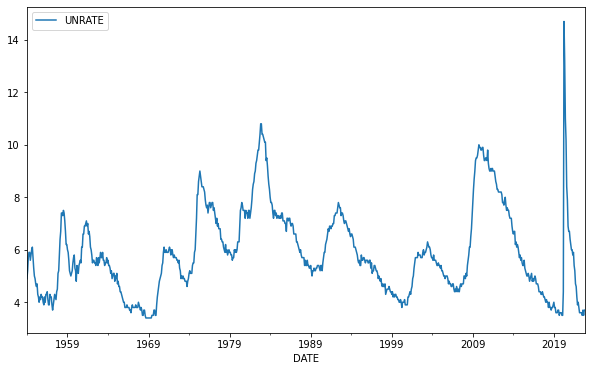

In [12]:
import pandas_datareader.data as web

# 데이터 로딩
unemployment_US = web.DataReader('UNRATE', 'fred', start='1954-01-01')
unemployment_US.plot(figsize=(10,6))
plt.show()

Optimization terminated successfully.
         Current function value: 0.560997
         Iterations: 3
         Function evaluations: 165


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Unobserved Components Results                            
=====================================================================================
Dep. Variable:                        UNRATE   No. Observations:                  827
Model:                           random walk   Log Likelihood                -463.944
                   + damped stochastic cycle   AIC                            935.889
Date:                       Mon, 02 Jan 2023   BIC                            954.745
Time:                               23:21:29   HQIC                           943.122
Sample:                           01-01-1954                                         
                                - 11-01-2022                                         
Covariance Type:                         opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
sigma2.level        0.0596      0.063      0.939      0.348      -0.065       0.184
sigma2.cycle        0.1125      0.062      1.826      0.068      -0.008       0.233
frequency.cycle     0.0744      0.046      1.616      0.106      -0.016       0.165
damping.cycle       0.9307      0.033     28.504      0.000       0.867       0.995
===================================================================================
Ljung-Box (L1) (Q):                   1.85   Jarque-Bera (JB):           6180756.09
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               9.67   Skew:                            17.22
Prob(H) (two-sided):                  0.00   Kurtosis:                       425.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

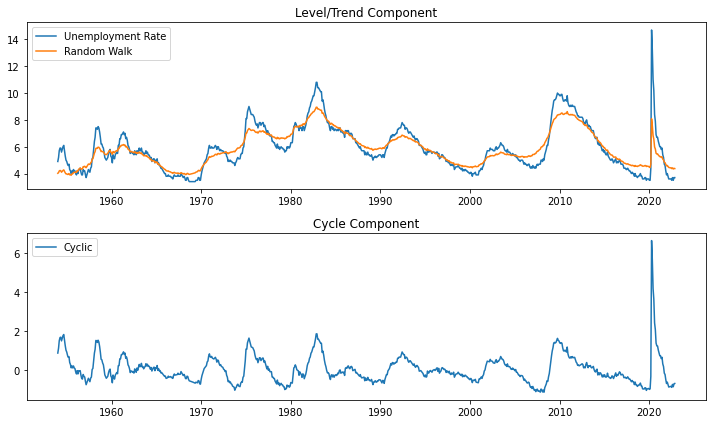

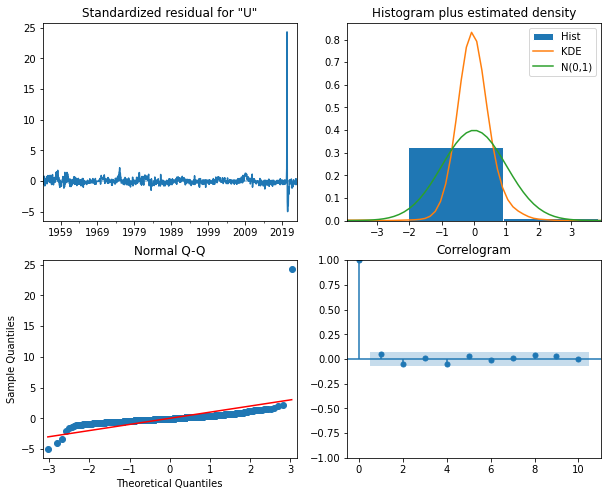

In [13]:
# 구조화모형 추정
model = sm.tsa.UnobservedComponents(unemployment_US, level='rwalk', cycle=True, 
                                    stochastic_cycle=True, damped_cycle=True)
result = model.fit(method='powell')
display(result.summary())

# 추정 시각화
fig, axes = plt.subplots(2, figsize=(10,6))
axes[0].plot(unemployment_US.index, unemployment_US.UNRATE, label='Unemployment Rate')
axes[0].plot(unemployment_US.index, result.level.smoothed, label='Random Walk')
axes[0].legend(loc='upper left')
axes[0].set(title='Level/Trend Component')
axes[1].set(title='Cycle Component')
axes[1].plot(unemployment_US.index, result.cycle.smoothed, label='Cyclic')
axes[1].legend(loc='upper left')
fig.tight_layout()
plt.show()

# 잔차진단
result.plot_diagnostics(figsize=(10,8))
plt.show()

- **주기적 성분 대신 AR(4) 모형 대체**

\begin{align*}
y_t & = \mu_t + \eta_t \\
\mu_{t+1} & = \mu_t + \epsilon_{t+1} \\
\phi(L) \eta_t & = \nu_t
\end{align*}

Optimization terminated successfully.
         Current function value: 0.554304
         Iterations: 3
         Function evaluations: 236


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:                 UNRATE   No. Observations:                  827
Model:                    random walk   Log Likelihood                -458.409
                              + AR(4)   AIC                            928.818
Date:                Mon, 02 Jan 2023   BIC                            957.118
Time:                        23:21:31   HQIC                           939.673
Sample:                    01-01-1954                                         
                         - 11-01-2022                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
sigma2.level     0.0751      0.164      0.458      0.647      -0.247       0.397
sigma2.ar        0.1008      0.166      0.606      0.545      -0.225       0.427
ar.L1            1.0606      0.104     10.206      0.000       0.857       1.264
ar.L2           -0.1736      0.299     -0.582      0.561      -0.759       0.411
ar.L3            0.0885      0.182      0.487      0.626      -0.268       0.445
ar.L4           -0.0212      0.076     -0.278      0.781      -0.171       0.128
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           6140626.31
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               9.36   Skew:                            17.16
Prob(H) (two-sided):                  0.00   Kurtosis:                       424.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

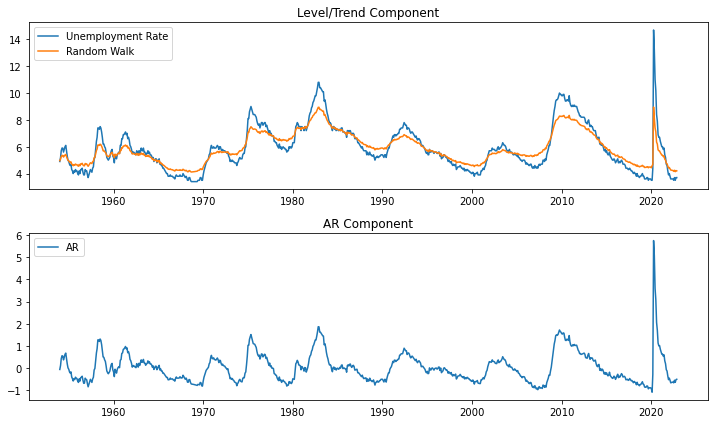

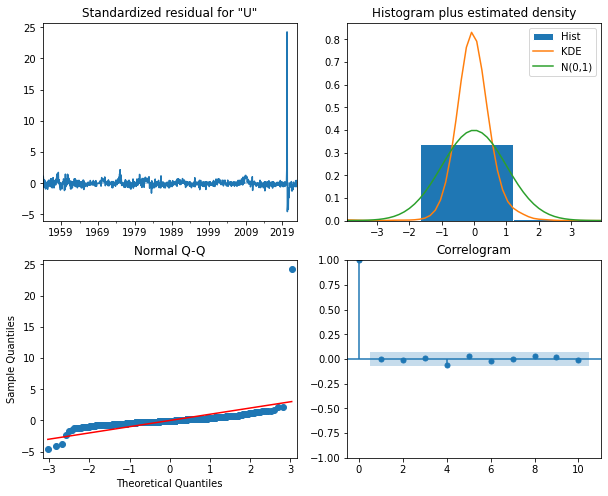

In [14]:
# 구조화모형 추정
model = sm.tsa.UnobservedComponents(unemployment_US, level='rwalk', autoregressive=4)
result = model.fit(method='powell')
display(result.summary())

# 추정 시각화
fig, axes = plt.subplots(2, figsize=(10,6))
axes[0].plot(unemployment_US.index, unemployment_US.UNRATE, label='Unemployment Rate')
axes[0].plot(unemployment_US.index, result.level.smoothed, label='Random Walk')
axes[0].legend(loc='upper left')
axes[0].set(title='Level/Trend Component')
axes[1].set(title='AR Component')
axes[1].plot(unemployment_US.index, result.autoregressive.smoothed, label='AR')
axes[1].legend(loc='upper left')
fig.tight_layout()
plt.show()

# 잔차진단
result.plot_diagnostics(figsize=(10,8))
plt.show()

# **다양한 확장 알고리즘 및 응용**

**1) 확률적 변동성 모형(Stochastic Volatility Model):**

- **정적 변동성 모형:** 
> - `ARCH(Autoregressive conditional heteroskedasticity)`
> - `GARCH(Generalized Autoregressive conditional heteroskedasticity)`

- **Heston 모형:** 정적 변동성 모형과 달리 `변동성 자체를 하나의 독립적인 상태 변수`로 가정 
> - 분산(Variance) 상태 변수 $\nu_t$를 가지는 연속 시간 모형 

$$
\begin{align*}
dS_t   &= \mu S_t\,dt + \sqrt{\nu_t} S_t\,dW^S_t  \\
d\nu_t &= \kappa(\theta - \nu_t)\,dt + \xi \sqrt{\nu_t}\,dW^{\nu}_t
\end{align*}
$$

---

**2) 히든 마코프 모형(Hidden Markov Model, HMM)**

> - `상태 변수`  $x$ 값이 `연속 확률변수가 아니라 1차원 이산 확률변수(Discrete Random Variable)인 경우 히든` 마코프 모형이 됨 
> - 히든 마코프 모형의 `상태 전이식`은 다음과 같은 `조건부 확률로 정의됨` 
> - `주로 음성 처리`에서 많이 사용되지만 경제학 분야에서도 `구조적 변화에 의한 시계열 특성이 변화하는 경우`에 사용됨 

> **(1) 독립 혼합 모형(Independent Mixuture Model)**
>
> **"`연속 확률변수`임에도 단일 확률분포를 가지지 않고 `복수의 확률분포를 가지는 경우`, 독립적 이산 확률분포로 복수의 확률분포를 추정하는 모형"**
>
> \begin{align*}
p(y) &= \sum_{i=1}^m {P}(C=i)\cdot {P}(Y=y|C=i) \\
&= \sum_{i=1}^m \delta_i p_i(y)
\end{align*}
>
> - $p(y)$: 전체 Independent Mixuture 분포
> - $pi(y)$: Independent Mixuture 각 성분(Component)의 개별적인 연속 확률분포
> - $\delta_i$: Mixing Parameter로 특정시간의 모든 성분 중 특정한 $pi(y)$가 선택될 확률(이산 확률 분포)
> - $\sum \delta_i$: Mixing Parameter에 대한 확률 제한 조건

> - **베르누이-정규 혼합모형(Binomial Normal-Mixture Model) 예시:** 베르누이 확률변수의 값에 따라 `두개의 서로다른 연속정규분포 중 하나를 선택`하는 확률분포
>
> <center><img src='Image/Expert/HMM_Normal-Mixture.png' width='500'></center> 
  
> **(2) 마코프 체인(Markov Chain)**
>
> - **마코프 체인(Markov Chain):** 다음과 같은 특성을 가진 `이산시간 확률 프로세스`
>
> \begin{align*}
P(C_{t+1} \mid C_t, \cdots, C_1) = P(C_{t+1} \mid C_t)
\end{align*}
>
> - **전이확률(Transition Probability):** $t$시간 동안 특정 상태 $i$에서 다른 상태 $j$로 `전이할 확률`
>
> \begin{align*}
\gamma_{ij}(t) = P(C_{s+t}=j|C_{s}=i)
\end{align*}
>
> - **전이행렬(Transition Matrix):** `모든 상태조합`에 대한 전이확률
>
> \begin{align*}
\Gamma(t) = \{ \gamma_{ij}(t) \}, \;\;\; \Gamma = \Gamma(1)
\end{align*}
>
> - **체프먼-콜모고로프 방정식(Chapman-Kolmogorov Equation):** 시간 $t+u$의 전이확률행렬은 시간$t$의 전이확률행렬과 시간 $u$의 전이확률행렬의 `곱`
>
> \begin{align*}
\Gamma(t+u) = \Gamma(t)\Gamma(u)
\end{align*}
>
> - **디코드(Decode):** 관측된 `HMM 모형의 연속 확률변수 값`으로 `내부의 이산 확률변수 값을 추정`하는 과정

> **(3) 히든 마코프 모형(Hidden Markov Model)**
>
> **"독립 혼합 모형에서 연속 확률분포를 선택하는 이산확률과정 $C_t$가 `마코프 체인`이고 연속확률분포 $Y_t$가 `그 시점의 이산 확률과정의 값에만 의존`하는 모형"**
>
> - 연속 확률 분포의 값 $X_t$만 `측정 가능`하고 이산 확률 과정의 값 $C_t$는 `측정 불가`
>
> \begin{align*}
P(C_t \mid |C_{t-1}, \cdots, C_1) = P(C_t \mid C_{t-1}) \\
P(Y_t \mid Y_t, \cdots, Y_1, C_t, \cdots, C_1) = P(Y_t \mid C_t)
\end{align*}
>
> <center><img src='Image/Expert/HMM_General.png' width='500'></center> 

- **HMM 모듈 정리**

```python
from hmmlearn import hmm
```

| 클래스 이름 | 용도 |
|:-------:|:-----------------:|
| GaussianHMM | Hidden Markov Model with Gaussian emissions |
| GMMHMM | Hidden Markov Model with Gaussian mixture emissions |
| MultinomialHMM | Hidden Markov Model with multinomial (discrete) emissions |

- **GaussianHMM:** `카테고리-다변수 정규분포 혼합` 모형 시뮬레이션

| 출력모듈 | 설명 |
|:--------|:--------------:|
| startprob_ | 초기 확률 벡터 |
| transmat_ | 전이 확률 행렬 |
| means_ | 정규 분포의 기댓값 벡터 |
| covars_ | 정규 분포의 공분산 행렬 |

---

**3) 칼만 필터**

> - 선형 동적 모형에 대한 `필터링 문제와 스무딩 문제를 푸는 방법` 중 가장 널리 쓰임 
> - 칼만 필터는 `확률 변수의 분포를 갱신하는 베이지안 필터(Bayesian Filter)`의 한 종류 
> - 가우시안 분포를 가지는 선형 시스템이라는 제약 조건을 훌륭하게 사용하여 `상태 변수의 평균과 분산을 간단히 갱신`하는 효율적 알고리즘 
>
> \begin{align*}
\text{Main Equation} && \alpha_t &= T_t \alpha_{t-1} + c_t + R_t \eta_t \\
&& y_t &= Z_t \alpha_t + d_t + \varepsilon_t \\
\text{where} && & \text{$\alpha_t$: State Vector} \\
&& & \text{$T_t$: Transition Matrix} \\
&& & \text{$c_t$: State Intercept Vector} \\
&& & \text{$R_t$: Selection Matrix} \\
&& & \text{$\eta_t \sim N(0, Q_t)$: Innovation Process Vector} \\
&& & \text{$Q_t$: State Covariance Matrix} \\
&& & \text{$y_t$: Observation Vector} \\
&& & \text{$Z_t$: Design Matrix} \\
&& & \text{$d_t$: Observation Intercept Vector} \\
&& & \text{$\epsilon_t \sim N(0, H_t)$: Observation Error Vector} \\
&& & \text{$H_t$: Observation Covariance Matrix} \\
\end{align*}

- [**Falman Filter 모듈 정리**](http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.kalman_filter.KalmanFilter.html)

```python
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter
model = KalmanFilter(yt, 
                     k_states=1, transition=[[1]], 
                     selection=[[1]],
                     state_cov=[[10]], design=[[1]], 
                     obs_cov=[[100]])
```

| 입력옵션 | 설명 |
|--------------------|--------------------------------------------------------------------------------------------------------|
| k_endog | 정수 혹은 배열. 배열인 경우에는 칼만필터를 적용할 실제 시계열 자료. 정수인 경우에는 출력 변수의 수 |
| k_states | 정수. 상태 변수의 수 |
| k_posdef | (옵션) 정수. 출력 잡음의 공분산 중 양 한정(Positive Definite)을 보장하는 차원의 수. 디폴트는 k_states |
| transition | (옵션) 상태 전이 행렬(Transition Matrix). 디폴트는 0 |
| state_intercept | (옵션) 상태 전이식의 절편(Intercept for the Transition Equation). 디폴트는 0 |
| selection | (옵션) 이노베이션 과정에 대한 선택 행렬(Selection Matrix). 디폴트는 0 |
| state_cov | (옵션) 이노베이션 과정의 공분산 행렬. 디폴트는 0 |
| design | (옵션) 설계 행렬(Design Matrix). 디폴트는 0 |
| obs_intercept | (옵션) 관측식의 절편(Intercept for the Observation Equation). 디폴트는 0 |
| obs_cov | (옵션) 관측 행렬의 공분산 행렬. 디폴트는 0 |
| initial_state | (옵션) 배열. 초기 상태 변수 값 |
| initialization | (옵션) 다음 문자열 중 하나 {approximate_diffuse, stationary, known} (옵션) 상태 변수 초기화 방법 |
| initial_variance | (옵션) 실수. 초기화 방법이 Approximate_diffuse 일 경우의 초기 분산 값. 디폴트는 1e6 |
| initial_state_cov | (옵션) 배열. 초기화 방법이 Known 일 경우 사용하는 분산 행렬 |
| nobs | (옵션) 정수. k_endog가 정수인 경우에 시계열 자료의 길이를 표시 |
| loglikelihood_burn | (옵션) 정수. Log-likelihood를 기록하지 않는 Burn-in 구간의 길이. 디폴트는 0 |
| tolerance | (옵션) 실수. 상태변수의 수렴 기준. 디폴트는 1e-19 |

| 출력모듈 | 설명 |
|--------------------------------|-----------------------------------------|
| simulate | 모수가 모두 충족된 경우 시뮬레이션 수행 |
| initialize_known | 초기 상태 생성 (상태값을 아는 경우) |
| initialize_stationary | 초기 상태 생성 (정상 상태) |
| initialize_approximate_diffuse | 초기 상태 생성 |
| filter | 필터링. FilterResults 객체 출력 |

---

**4) 마코프 체인 몬테카를로(Markov Chain Monte Carlo, MCMC)**

> - 상태 공간 모형의 `확률 분포가 가우시안 정규 분포가 아니거나 정확한 분포의 수식을 알 수 없을 때` 주로 활용 
> - MCMC 방법은 특정한 `마코프 체인 확률 과정`을 사용하여 `생성한 시뮬레이션을 통해 분포의 형상을 추정` 

---

**5) 응용 사례**

> - `자동 제어(automatic)`, `항법(navigation) 시스템`. `신호처리(signal processing)` 분야에 많이 사용 
> - 최근에는 `경제학이나 일반 시계열 모형`에서도 상태 공간 모형이 일반화 
> - [도립진자](https://www.youtube.com/watch?v=B6vr1x6KDaY), [카메라 안정기](https://www.youtube.com/watch?v=X2vvdJGxPkI), [드론 항법 장치](https://www.youtube.com/watch?v=7BoDS9Gzsko)
>
>
> **"ARMA 모형에서 다루기 힘든 문제들을 해결하는데 도움"**  
>
> (1) 시계열의 `구조적 모형(structural model)`  
> (2) 일부 `누락된 데이터(missing data)`가 있는 경우  
> (3) 시간에 따라 `모형 계수가 변화(time-varing or switching)`하는 경우  
> (4) `변수`의 분포가 `정규 분포가 아닌 경우`  

## 확률적변동성 모델링 실습


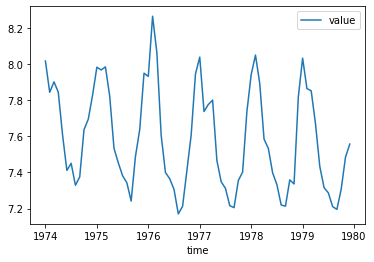

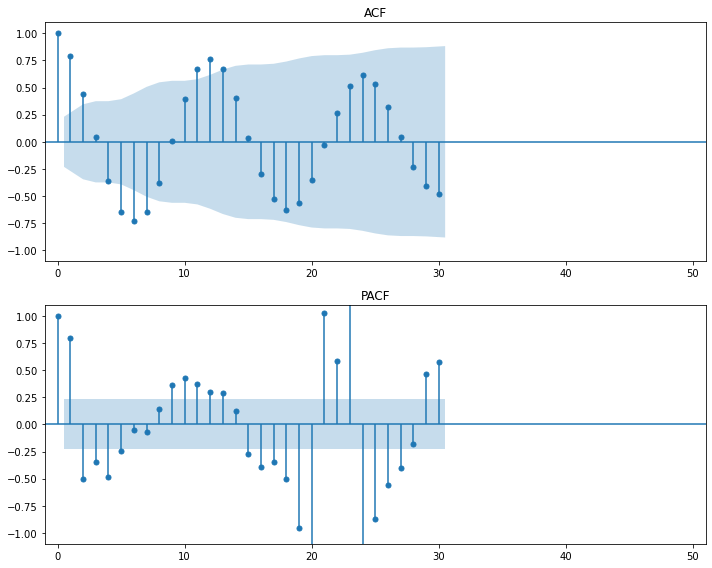

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : BIC=-38.786, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=31.069, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=-36.959, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=-22.813, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=500.526, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : BIC=-43.810, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : BIC=-38.120, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=-46.858, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : BIC=-58.152, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : BIC=-54.371, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : BIC=-61.320, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : BIC=-55.736, Time=0.10 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : BIC=-65.971, Time=0.20 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : BIC=-68.395, Time=0.09 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : BIC=-68.39

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   72
Model:               SARIMAX(4, 0, 0)   Log Likelihood                  47.028
Date:                Mon, 02 Jan 2023   AIC                            -82.055
Time:                        23:23:33   BIC                            -68.395
Sample:                             0   HQIC                           -76.617
                                 - 72                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.4890      0.627      7.161      0.000       3.260       5.718
ar.L1          0.9197      0.135      6.836      0.000       0.656       1.183
ar.L2         -0.2482      0.178     -1.395      0.163      -0.597       0.100
ar.L3          0.2135      0.178      1.199      0.230      -0.135       0.562
ar.L4         -0.4763      0.142     -3.364      0.001      -0.754      -0.199
sigma2         0.0152      0.003      5.713      0.000       0.010       0.020
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                 3.96
Prob(Q):                              0.32   Prob(JB):                         0.14
Heteroskedasticity (H):               1.12   Skew:                             0.55
Prob(H) (two-sided):                  0.78   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

,MAE,MSE,MAPE
Score,0.10,0.02,0.01


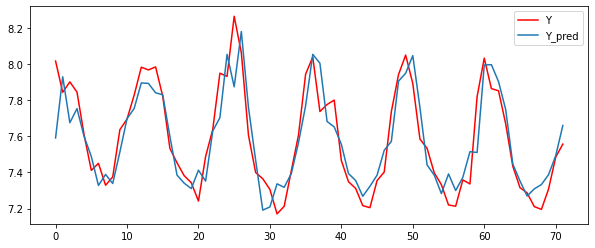

In [16]:
# 데이터로딩 및 확인
data = sm.datasets.get_rdataset("deaths", "MASS")
df = data.data
df.value = np.log(df.value)
df.plot(x='time', y='value')
plt.show()

# ACF/PACF 확인
plt.figure(figsize=(10, 8))
plot_acf(df.value.values, lags=30, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("ACF")

plot_pacf(df.value.values, lags=30, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("PACF")
plt.tight_layout()
plt.show()

# 모델링
model_autoarima = AutoARIMA(stationary=False,
                            seasonal=True,
                            with_intercept='auto',
                            test='adf',
                            information_criterion='bic',
                            n_jobs=-1,
                            trace=True)
model_autoarima.fit(df.value)
display(model_autoarima.summary())
Y_pred, Y_pred_ci = model_autoarima.predict_in_sample(return_conf_int=True)

# 성능 검증
display(evaluation_reg(df.value, Y_pred))

# 추정 시각화
df.value.plot(color='red', figsize=(10,4), label='Y')
plt.plot(Y_pred, label='Y_pred')
plt.legend()
plt.show()

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : BIC=-38.786, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=31.069, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=-36.959, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=-22.813, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=500.526, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : BIC=-43.810, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : BIC=-38.120, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=-46.858, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : BIC=-58.152, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : BIC=-54.371, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : BIC=-61.320, Time=0.18 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : BIC=-55.736, Time=0.11 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : BIC=-65.971, Time=0.20 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : BIC=-68.395, Time=0.09 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : BIC=-68.39

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   72
Model:               SARIMAX(4, 0, 0)   Log Likelihood                  47.028
Date:                Mon, 02 Jan 2023   AIC                            -82.055
Time:                        23:23:45   BIC                            -68.395
Sample:                             0   HQIC                           -76.617
                                 - 72                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.4890      0.627      7.161      0.000       3.260       5.718
ar.L1          0.9197      0.135      6.836      0.000       0.656       1.183
ar.L2         -0.2482      0.178     -1.395      0.163      -0.597       0.100
ar.L3          0.2135      0.178      1.199      0.230      -0.135       0.562
ar.L4         -0.4763      0.142     -3.364      0.001      -0.754      -0.199
sigma2         0.0152      0.003      5.713      0.000       0.010       0.020
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                 3.96
Prob(Q):                              0.32   Prob(JB):                         0.14
Heteroskedasticity (H):               1.12   Skew:                             0.55
Prob(H) (two-sided):                  0.78   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Iteration:      5,   Func. Count:     35,   Neg. LLF: -44.630035465303834
Optimization terminated successfully    (Exit mode 0)
            Current function value: -44.63016006023409
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8


,MAE,MSE,MAPE
Score,0.10,0.02,0.01


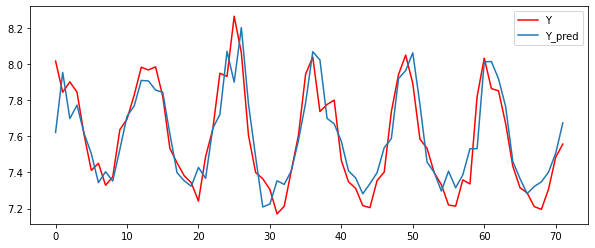

In [17]:
# 모델링
## ARIMA
model_autoarima = AutoARIMA(stationary=False,
                            seasonal=True,
                            with_intercept='auto',
                            test='adf',
                            information_criterion='bic',
                            n_jobs=-1,
                            trace=True)
model_autoarima.fit(df.value)
display(model_autoarima.summary())
Y_pred, Y_pred_ci = model_autoarima.predict_in_sample(return_conf_int=True)
## GARCH
model_garch = arch_model(model_autoarima.model_.resid(),
                         p=1, o=0, q=1,
                         mean='constant', vol='GARCH', dist='normal')
model_garch_fit = model_garch.fit(update_freq=5)
Y_pred_vol = model_garch_fit.forecast(start=df.index[0]).variance
Y_pred_final = Y_pred + np.ravel(Y_pred_vol)

# 성능 검증
display(evaluation_reg(df.value, Y_pred_final))

# 추정 시각화
df.value.plot(color='red', figsize=(10,4), label='Y')
plt.plot(Y_pred_final, label='Y_pred')
plt.legend()
plt.show()

## 히든마코프 모델링 실습

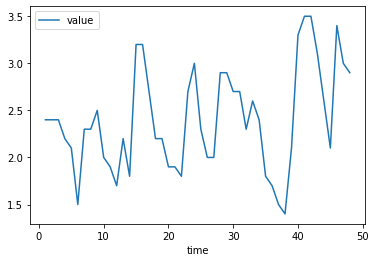

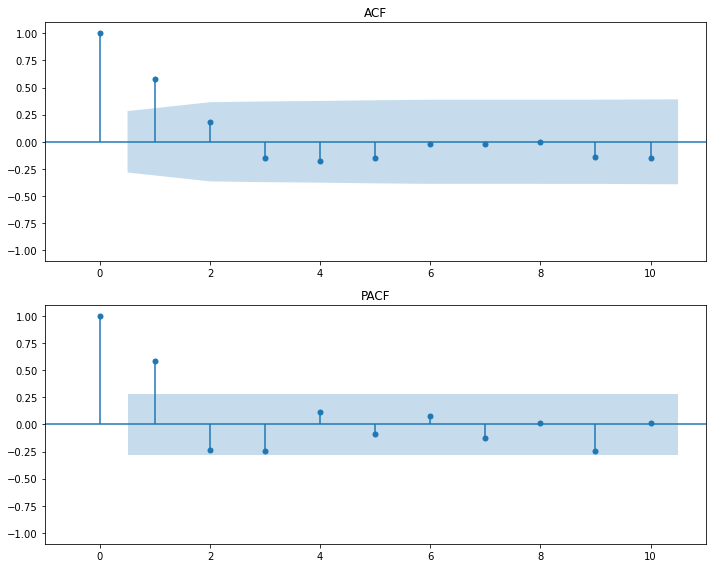

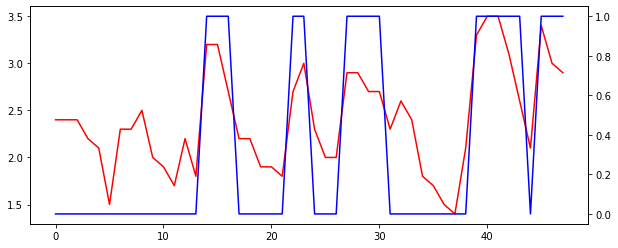

In [18]:
# 데이터로딩 및 확인
data = sm.datasets.get_rdataset("lh")
df = data.data
df.plot(x='time', y='value')
plt.show()

# ACF/PACF 확인
plt.figure(figsize=(10, 8))
plot_acf(df.value, lags=10, ax=plt.subplot(211))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("ACF")

plot_pacf(df.value, lags=10, ax=plt.subplot(212))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("PACF")
plt.tight_layout()
plt.show()

# 모델링
n_states = 2
model_ghmm = GaussianHMM(n_components=n_states, n_iter=100)
model_ghmm.fit(np.array(df[['value']]))
Y_pred = model_ghmm.predict(np.array(df[['value']]))

# 추정 시각화
ax1 = df.value.plot(color='red', figsize=(10,4))
ax2 = ax1.twinx()
ax2.plot(Y_pred, color='blue')
plt.show()

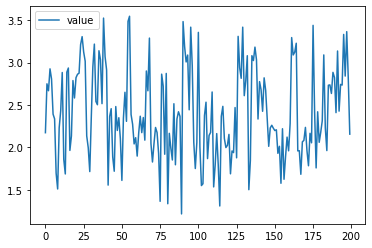

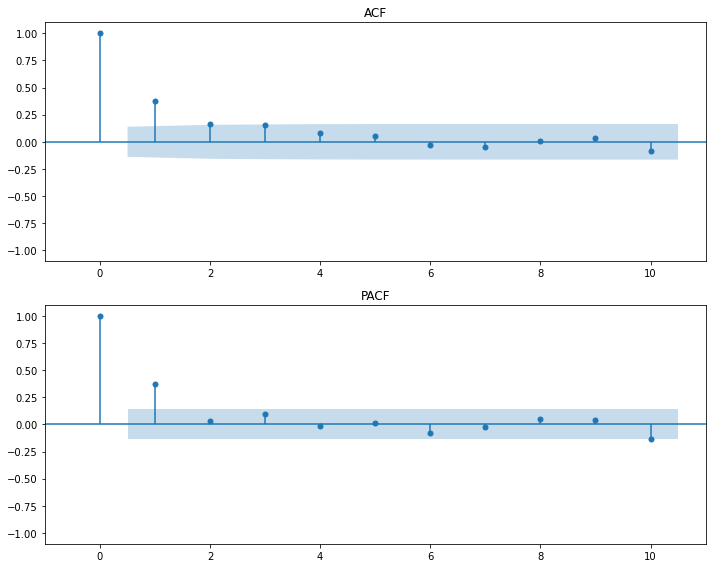

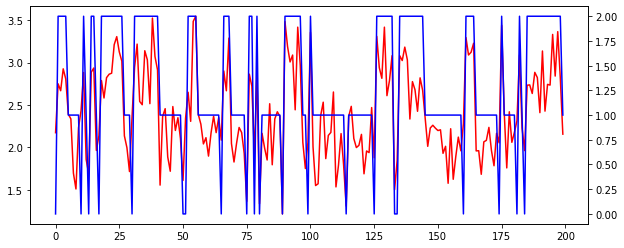

In [19]:
# 데이터생성
df = pd.DataFrame(np.squeeze(model_ghmm.sample(200)[0]), columns=['value'])
df.plot()
plt.show()

# ACF/PACF 확인
plt.figure(figsize=(10, 8))
plot_acf(df.value, lags=10, ax=plt.subplot(211))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("ACF")

plot_pacf(df.value, lags=10, ax=plt.subplot(212))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("PACF")
plt.tight_layout()
plt.show()

# 모델링
n_states = 3
model_ghmm = GaussianHMM(n_components=n_states, n_iter=100)
model_ghmm.fit(np.array(df[['value']]))
Y_pred = model_ghmm.predict(np.array(df[['value']]))

# 추정 시각화
ax1 = df.value.plot(color='red', figsize=(10,4))
ax2 = ax1.twinx()
ax2.plot(Y_pred, color='blue')
plt.show()

## 칼만필터 모델링 실습

\begin{align*}
\mu_t &= \mu_{t-1} + w_t,\;\;\;  &w_t \sim N(\mu=0, \sigma^2=10) \\
Y_{t} &= \mu_{t}   + v_t,\;\;\;  &v_t \sim N(\mu=0, \sigma^2=100) \\
\end{align*}

In [22]:
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.statespace.kalman_filter import KalmanFilter

# # 데이터 생성
# np.random.seed(123)
# model_generator = KalmanFilter(k_endog=1, k_states=1,
#                                transition=[[1]], selection=[[1]], state_cov=[[10]],
#                                design=[[1]], obs_cov=[[100]])
# y_gener, x_gener = model_generator.simulate(100)

# # 데이터 생성
# plt.figure(figsize=(10,6))
# plt.plot(y_gener, 'r:', label="Observation Values")
# plt.plot(x_gener, 'g-', label="State Values")
# plt.legend()
# plt.title("Simulation of Local Level Model ($\sigma_w^2 = 10$, $\sigma_v^2 = 100$)")
# plt.show()

# # Kalman Filter 모델링
# fit = KalmanFilter(y_gener, k_states=1,
#                    transition=[[1]], selection=[[1]], state_cov=[[10]],
#                    design=[[1]], obs_cov=[[100]])
# fit.initialize_known([0], [[1]])
# result = fit.filter()

# # 추정 시각화
# plt.figure(figsize=(10,6))
# plt.plot(fit.obs[0], 'r:', label="Observation Values")
# plt.plot(result.filtered_state[0], "b-.", label="Estimations of State Values")
# plt.plot(x_gener, "g-", label="Real State Values")
# plt.legend()
# plt.title("State Estimation of Local Level Model ($\sigma_w^2 = 10$, $\sigma_v^2 = 100$)")
# plt.show()

# **딥러닝 알고리즘**

---

> **"통계추론, 기계학습 및 딥러닝의 흐름에 따라 `시간패턴`을 반영하려 진화"**
>
> **"`지도학습(예측 분류), 비지도학습` 문제에 모두 활용되는 필수 알고리즘"** 

<center><img src='Image/Expert/TS_Evolution.png' width='900'></center>

<!-- <center><img src='Image/Expert/Performance_Explanability_TimeSeries.png' width='600'></center> -->

---

**2) 기계학습/딥러닝 알고리즘:** `컴퓨팅` 기반 `인공지능 알고리즘`으로 `정확성 높은 비선형 관계` 추론

> - `Prophet`
> - `Neural Prophet`
> - `RNN(Recurrent Neural Network)`
> - `LSTM(Long Short-Term Memory)`
> - `GRU(Gated Recurrent Unit)`
> - Neural Networks Autoregression(NNAR)
> - Attention
> - Self-attention
> - Transformer

---

**3) 시계열 데이터분석에 딥러닝을 사용해야 하는 이유:**

> **(1) 딥러닝은 불완전하고 전처리없는 `Raw 데이터`에서 `자동으로 변수들을 추출`하고 학습 가능**
>
> **(2) 데이터 형태와 갯수에 상관없이 약간의 처리를 통해 딥러닝은 `여러개의 입력을(Multiple Input) 받아 여러개의 출력을(Multivariate Output) 쉽게 가능`하게 함**
>
> **(3) 비교적 `길이가 긴 시퀀스(Sequence)에 걸쳐있는 데이터 패턴` 추출도 가능**
